In [1]:
# MOABB P300 데이터셋 접근 및 확인 코드 (주피터 노트북 실행용)

# 1. MOABB 설치 및 필요한 라이브러리 임포트
!pip install moabb mne numpy scikit-learn matplotlib

# 필수 라이브러리 불러오기
from moabb.datasets import BNCI2014009  # P300 데이터셋
from moabb.paradigms import P300
from moabb.evaluations import WithinSessionEvaluation
from moabb.pipelines.features import XdawnCovariances
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name 'XdawnCovariances' from 'moabb.pipelines.features' (/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/moabb/pipelines/features.py)

In [37]:
# MOABB P300 데이터셋 접근 및 확인 코드 (MOABB 공식 예제 기반)

import warnings  # 경고 메시지 처리를 위한 모듈
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
import seaborn as sns  # 시각화 보조 라이브러리
from mne.decoding import Vectorizer  # EEG 데이터를 벡터로 변환
from pyriemann.estimation import Xdawn, XdawnCovariances  # Xdawn 알고리즘 사용
from pyriemann.tangentspace import TangentSpace  # 탄젠트 공간 투영
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA 분류기
from sklearn.pipeline import make_pipeline  # 파이프라인 생성 도구
import moabb  # MOABB 라이브러리
from moabb.datasets import BNCI2014_008  # P300 데이터셋 BNCI2014_009
from moabb.evaluations import WithinSessionEvaluation  # 세션 내 평가
from moabb.paradigms import P300  # P300 Paradigm
import numpy as np  # numpy 라이브러리 임포트
from tensorflow.keras.models import Sequential  # Sequential 모델 임포트
from tensorflow.keras.layers import Dense, Flatten
from mne.decoding import CSP  # CSP 모듈 임포트
from scipy.signal import spectrogram  # spectrogram 함수 임포트

In [3]:
# 경고 메시지 숨기기
warnings.simplefilter(action="ignore", category=FutureWarning)  # 미래 경고 숨기기
warnings.simplefilter(action="ignore", category=RuntimeWarning)  # 런타임 경고 숨기기
moabb.set_log_level("info")  # MOABB 로그 레벨 설정


In [18]:
# P300 Paradigm 설정
paradigm = P300()  # P300 Paradigm 생성
dataset = BNCI2014_008()  # BNCI2014_009 데이터셋 불러오기

In [19]:
# 데이터셋 정보 출력
print(dataset)  # 데이터셋의 메타 정보 출력

In [20]:
# 데이터 로드
X, labels, metadata = paradigm.get_data(dataset, subjects=[1])  # 1번 피험자의 데이터 로드
print(f"데이터 형태: {X.shape}")  # 데이터 형태 출력
print(f"라벨: {np.unique(labels)}")  # 고유한 라벨 출력

/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/urllib3/connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 12.7GB/s]
SHA256 hash of downloaded file: cdf9bca4f48c61ee9c9ba998382a4e84392918c9dbc5a43f45ee0052614e25bd
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


데이터 형태: (4200, 8, 257)
라벨: ['NonTarget' 'Target']


/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 4200 events (all good), 0 – 1 s (baseline off), ~65.9 MiB, data loaded,
 'Target': 700
 'NonTarget': 3500>
  warn(f"warnEpochs {epochs}")


In [21]:
# XdawnCovariances로 특징 추출
xdawn = XdawnCovariances(nfilter=4)  # 4개의 필터를 사용한 Xdawn 특징 추출
features = xdawn.fit_transform(X, labels)  # 데이터에 Xdawn 적용하여 특징 추출

In [22]:
# LDA로 학습
clf = make_pipeline(Vectorizer(), LinearDiscriminantAnalysis())  # 벡터화와 LDA를 포함한 파이프라인 생성
clf.fit(features, labels)  # 모델 학습

Pipeline(steps=[('vectorizer',
                 <mne.decoding.transformer.Vectorizer object at 0x12f65a560>),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [23]:
# 성능 확인
score = clf.score(features, labels)  # 학습된 모델로 정확도 측정
print(f"모델 정확도: {score * 100:.2f}%")  # 정확도 출력

모델 정확도: 83.69%


/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{

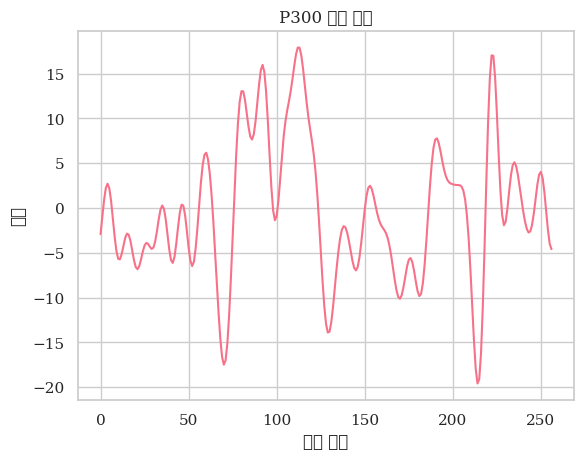

In [24]:
# P300 시각화
plt.figure()  # 새 그래프 생성
plt.plot(X[0, 0, :])  # 첫 번째 trial의 첫 번째 채널 데이터 시각화
plt.title("P300 신호 예시")  # 그래프 제목
plt.xlabel("시간 샘플")  # x축 레이블
plt.ylabel("진폭")  # y축 레이블
plt.show()  # 그래프 출력


In [28]:
# 2. Raw 데이터로 FC Layer 학습
X_raw = X.reshape((X.shape[0], -1))  # FC Layer 입력을 위해 2D로 변환
model_raw = Sequential([
    Dense(128, activation='relu', input_shape=(X_raw.shape[1],)),  # 첫 Dense 레이어
    Dense(64, activation='relu'),  # 두 번째 Dense 레이어
    Dense(1, activation='sigmoid')  # 출력 레이어 (이진 분류)
])
model_raw.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # 모델 컴파일
model_raw.fit(X_raw, labels, epochs=10, batch_size=32)  # 모델 학습

/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Invalid dtype: str288

In [31]:
# 1. Raw 데이터 기반 FC Layer 학습
X_raw = X.reshape((X.shape[0], -1)).astype('float32')  # 데이터 변환
# 문자열 라벨을 0과 1로 변환
labels = np.where(labels == 'Target', 1, 0).astype('int')
model_raw = Sequential([
    Dense(128, activation='relu', input_shape=(X_raw.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_raw.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_raw = model_raw.fit(X_raw, labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7006 - loss: 3.1316 - val_accuracy: 0.7417 - val_loss: 1.5918
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.9789 - val_accuracy: 0.7750 - val_loss: 1.5754
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.5506 - val_accuracy: 0.7024 - val_loss: 1.3352
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9046 - loss: 0.3415 - val_accuracy: 0.7702 - val_loss: 1.5287
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9294 - loss: 0.2401 - val_accuracy: 0.7607 - val_loss: 1.7757
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1527 - val_accuracy: 0.7476 - val_loss: 1.7135
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9635 - loss: 0.1107 - val_accuracy: 0.7595 - val_loss: 1.7307
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.1120 - val_accuracy: 0.

In [35]:
# 2. CSP 전처리 데이터 기반 FC Layer 학습
csp = CSP(n_components=4)
X_csp = csp.fit_transform(X, labels).astype('float32')  # CSP 적용 및 float 변환
model_csp = Sequential([
    Dense(128, activation='relu', input_shape=(X_csp.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_csp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_csp = model_csp.fit(X_csp, labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7711 - loss: 0.5214 - val_accuracy: 0.8333 - val_loss: 0.4601
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.8326 - loss: 0.4550 - val_accuracy: 0.8333 - val_loss: 0.4556
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8303 - loss: 0.4525 - val_accuracy: 0.8333 - val_loss: 0.4535
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8387 - loss: 0.4425 - val_accuracy: 0.8333 - val_loss: 0.4531
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8300 - loss: 0.4544 - val_accuracy: 0.8333 - val_loss: 0.4544
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8285 - loss: 0.4570 - val_accuracy: 0.8333 - val_loss: 0.4530
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8425 - loss: 0.4339 - val_accuracy: 0.8333 - val_loss: 0.4522
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8203 - loss: 0.4713 - va

In [38]:
# 3. SST 전처리 데이터 기반 FC Layer 학습
X_sst = []
for trial in X:
    f, t, Sxx = spectrogram(trial, fs=256)
    X_sst.append(Sxx.flatten())
X_sst = np.array(X_sst).astype('float32')  # SST 변환 및 float 변환
model_sst = Sequential([
    Dense(128, activation='relu', input_shape=(X_sst.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_sst.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_sst = model_sst.fit(X_sst, labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.7182 - val_accuracy: 0.8333 - val_loss: 0.5143
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8338 - loss: 0.4805 - val_accuracy: 0.8321 - val_loss: 0.4924
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4704 - val_accuracy: 0.8321 - val_loss: 0.4981
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8352 - loss: 0.4495 - val_accuracy: 0.8298 - val_loss: 0.4829
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8269 - loss: 0.4465 - val_accuracy: 0.8345 - val_loss: 0.4842
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.4112 - val_accuracy: 0.8333 - val_loss: 0.5093
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.4327 - val_accuracy: 0.8286 - val_loss: 0.5058
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.4091 - val_accuracy: 0.

/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/winterurp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020

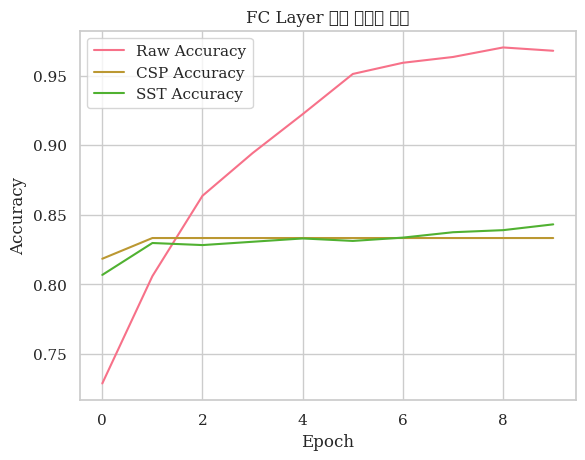

In [39]:
# 4. 성능 비교 시각화
plt.figure()
plt.plot(history_raw.history['accuracy'], label='Raw Accuracy')
plt.plot(history_csp.history['accuracy'], label='CSP Accuracy')
plt.plot(history_sst.history['accuracy'], label='SST Accuracy')
plt.title('FC Layer 학습 정확도 비교')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 각 코드 설명:
# - Raw 데이터: 전처리 없이 FC Layer에 직접 입력.
# - CSP 데이터: 공간 패턴을 추출하여 FC Layer 입력.
# - SST 데이터: 시-주파수 변환으로 특징을 추출해 입력.
# - 최종 시각화: 각 데이터셋의 학습 정확도를 그래프 형태로 비교.